In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats

# Overview

In [12]:
from lib.io.load import load_data

In [13]:
df = load_data()
df.head()

Loading data from: ../data/train.csv


/home/ali/Desktop/aiPrac/ML/credit_score/notebooks/lib/io/load.py:20: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(file_path)


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [14]:
len(df.columns)

28

In [15]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [17]:
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()

# Plot

In [27]:
# sns.boxplot(data= df, x= df.Age);

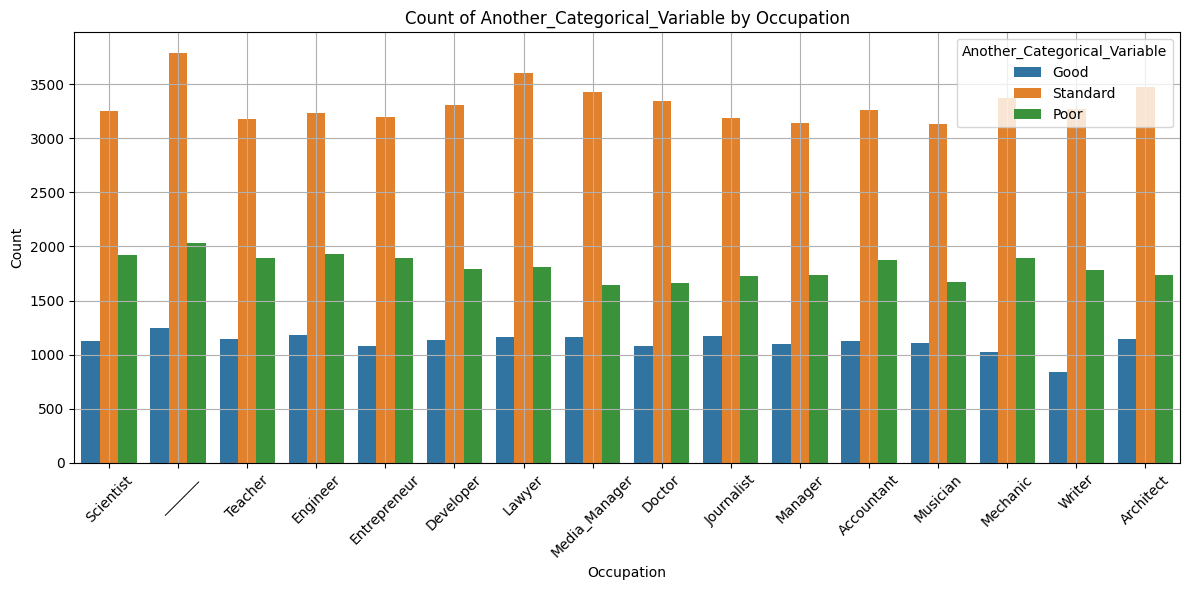

In [25]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Occupation', hue='Credit_Score', data=df)
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Count of Another_Categorical_Variable by Occupation')
plt.xticks(rotation=45)
plt.legend(title='Another_Categorical_Variable')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# sns.boxplot(data= df, x = df.Delay_from_due_date);

# Outliers

In [18]:
from lib.analysis.plots import visualize_outliers

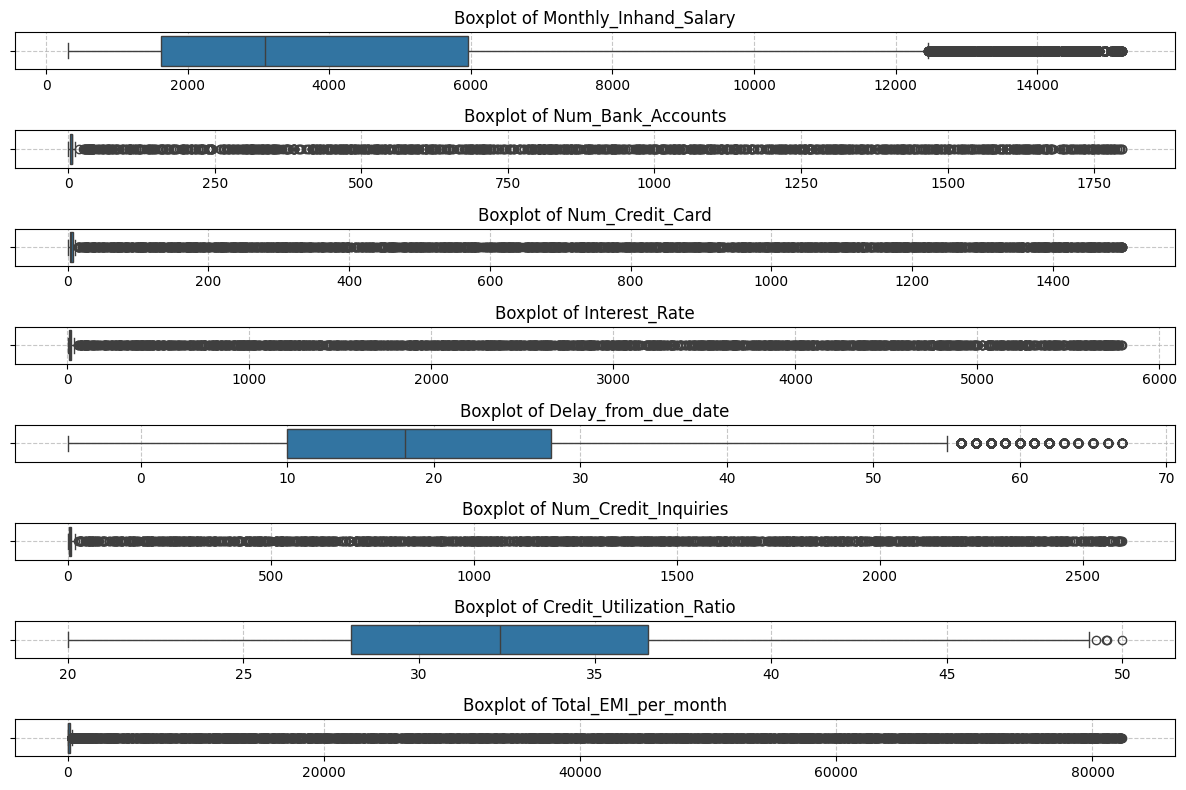

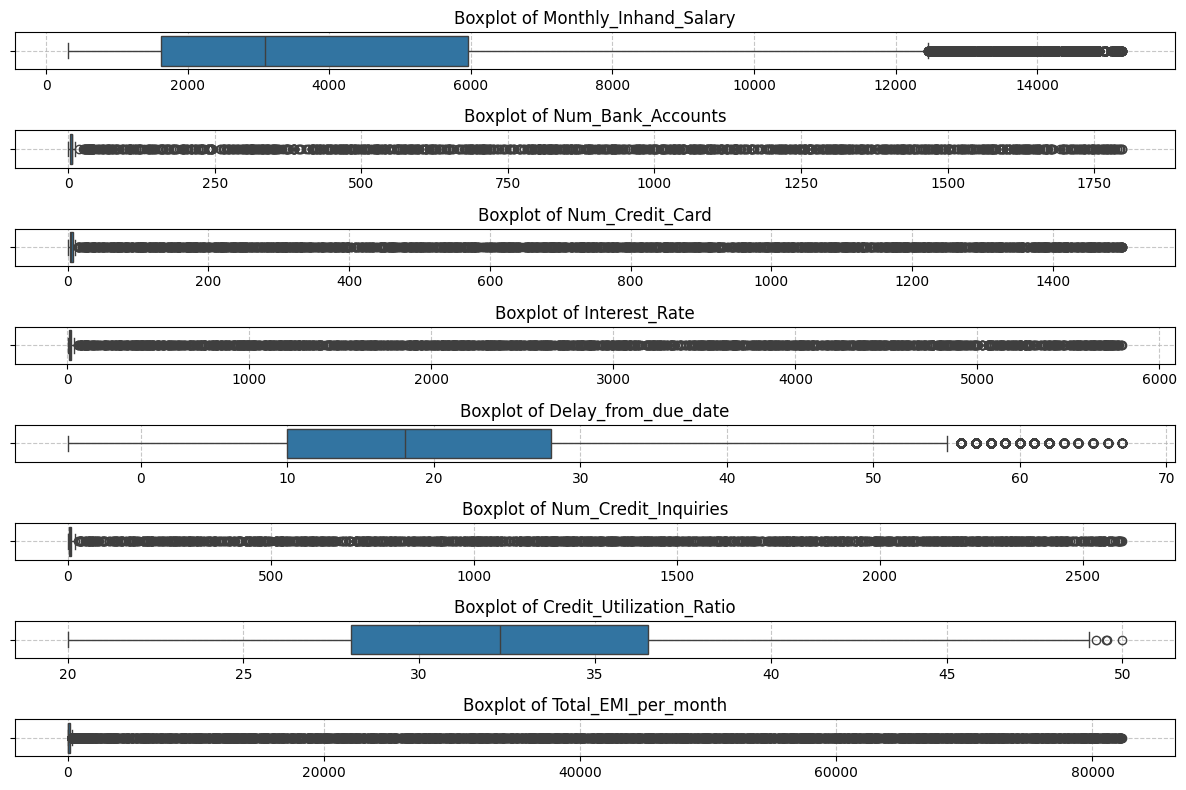

In [19]:
visualize_outliers(df, columns=numerical_columns)

In [24]:
from lib.analysis.outliers import calculate_zscore_outliers

for col in numerical_columns:
    count, pct = calculate_zscore_outliers(df[col])  # Pass the actual column data
    print(f"Column: {col}")
    print(f"Count of outliers: {count}")
    print(f"Percentage of outliers: {pct:.2f}%")
    print("------------")


Column: Monthly_Inhand_Salary
Count of outliers: 0
Percentage of outliers: 0.00%
------------
Column: Num_Bank_Accounts
Count of outliers: 1049
Percentage of outliers: 1.05%
------------
Column: Num_Credit_Card
Count of outliers: 1636
Percentage of outliers: 1.64%
------------
Column: Interest_Rate
Count of outliers: 1501
Percentage of outliers: 1.50%
------------
Column: Delay_from_due_date
Count of outliers: 54
Percentage of outliers: 0.05%
------------
Column: Num_Credit_Inquiries
Count of outliers: 0
Percentage of outliers: 0.00%
------------
Column: Credit_Utilization_Ratio
Count of outliers: 16
Percentage of outliers: 0.02%
------------
Column: Total_EMI_per_month
Count of outliers: 2155
Percentage of outliers: 2.15%
------------


# Correlation

In [20]:
df[numerical_columns].corr()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
Monthly_Inhand_Salary,1.000000,-0.010819,-0.005049,-0.006422,-0.250100,-0.008867,0.173192,0.007264
Num_Bank_Accounts,-0.010819,1.000000,-0.002216,-0.003998,0.015966,-0.001683,-0.001365,-0.001433
Num_Credit_Card,-0.005049,-0.002216,1.000000,-0.004012,0.008715,-0.003479,-0.003341,0.000768
Interest_Rate,-0.006422,-0.003998,-0.004012,1.000000,0.009792,-0.001681,-0.000359,0.002517
Delay_from_due_date,-0.250100,0.015966,0.008715,0.009792,1.000000,0.011508,-0.063796,-0.003889
Num_Credit_Inquiries,-0.008867,-0.001683,-0.003479,-0.001681,0.011508,1.000000,0.000145,-0.007031
Credit_Utilization_Ratio,0.173192,-0.001365,-0.003341,-0.000359,-0.063796,0.000145,1.000000,0.001389
Total_EMI_per_month,0.007264,-0.001433,0.000768,0.002517,-0.003889,-0.007031,0.001389,1.000000


In [21]:
from lib.analysis.plots import create_correlation_heatmap

Top 10 highest correlations:
Delay_from_due_date       Monthly_Inhand_Salary       0.250100
Monthly_Inhand_Salary     Delay_from_due_date         0.250100
Credit_Utilization_Ratio  Monthly_Inhand_Salary       0.173192
Monthly_Inhand_Salary     Credit_Utilization_Ratio    0.173192
Credit_Utilization_Ratio  Delay_from_due_date         0.063796
Delay_from_due_date       Credit_Utilization_Ratio    0.063796
Num_Bank_Accounts         Delay_from_due_date         0.015966
Delay_from_due_date       Num_Bank_Accounts           0.015966
Num_Credit_Inquiries      Delay_from_due_date         0.011508
Delay_from_due_date       Num_Credit_Inquiries        0.011508
dtype: float64


<Figure size 1200x1000 with 0 Axes>

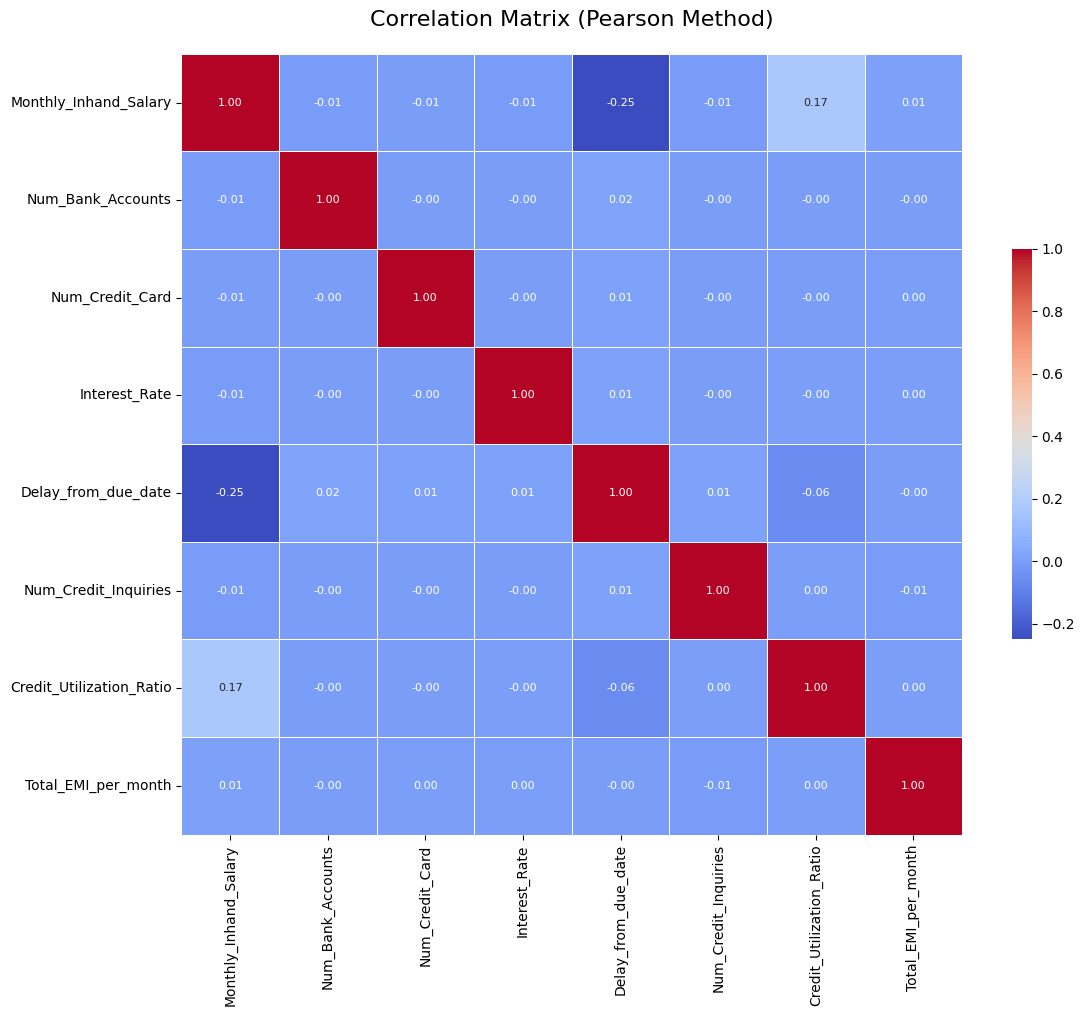

In [22]:
fig, corr = create_correlation_heatmap(df)
# # To identify most correlated features
# # Get the absolute correlation values and sort
corr_abs = corr.abs().unstack()
corr_abs = corr_abs[corr_abs < 1.0]  # Remove self-correlations
high_correlations = corr_abs.sort_values(ascending=False)[:10]  # Top 10
print("Top 10 highest correlations:")
print(high_correlations)